## import the libraries

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter

!pip install plotly-geo==1.0.0
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

# #relevant ML libraries
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

# #ML models
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install plotly
!pip install plotly-geo==1.0.0
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

import plotly.figure_factory as ff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/ECE 225A Project/hmda_2017_ca_all-records_labels.csv')
df.head(3)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,NaN,4824.0,37.230000,75200.0,57.419998,818.0,1626.0,NaN
1,2017,0000146672,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,7404.0,57.520000,63200.0,116.010002,1215.0,1743.0,NaN
2,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,3372.0,33.189999,97400.0,141.740005,592.0,1105.0,NaN


## skim the dataset

In [ ]:
# remove loan applicants that are not of conventional type
df.drop(df[(df.loan_type != 1)].index, inplace=True)

# remove property type that are not of One-to-four family dwelling
df.drop(df[(df.property_type != 1)].index, inplace=True)

# only focus on application for purchasing houses
df.drop(df[(df.loan_purpose != 1)].index, inplace=True)

# remove applicants who failed to complete the process
df.drop(df[(df.action_taken >= 4)].index, inplace=True)

# we only want owner-occupied as a principal dwelling
df.drop(df[(df.owner_occupancy != 1)].index, inplace=True)

In [ ]:
race_replacement = {'Black or African American': 'Black',
                   'Information not provided by applicant in mail, Internet, or telephone application': 'NaN',
                   'American Indian or Alaska Native': 'Native',
                   'Native Hawaiian or Other Pacific Islander': 'Islander',
                   'Not applicable': 'NaN'}
df['applicant_race_name_1'].replace(race_replacement, inplace=True)

In [ ]:
action_replacement = {'Loan originated': 'Approved',
                     'Application approved but not accepted': 'Approved',
                     'Application denied by financial institution': 'Denied'}
df['action_taken_name'].replace(action_replacement, inplace=True)

In [ ]:
sex_replacement = {'Information not provided by applicant in mail, Internet, or telephone application': 'NaN',
                   'Not applicable': 'NaN'}
df['applicant_sex_name'].replace(sex_replacement, inplace=True)

In [ ]:
# drop rows that is of NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.replace('', np.nan, regex=True, inplace=True)
df.replace('NaN', np.nan, inplace=True)
df.replace('nan', np.nan, inplace=True)
df.dropna(how='all', inplace=True)

In [ ]:
# drop rows that do not cantain the income info
subset = ['agency_abbr',
'loan_type_name',         
'property_type_name',     
'loan_purpose_name',   
'owner_occupancy_name',   
'loan_amount_000s', 
'action_taken_name',     
'county_name',    
'applicant_race_name_1',
'applicant_sex_name',
'applicant_income_000s']
df.dropna(subset=subset, inplace=True)

In [ ]:
# denote the indices of columns that we would like to drop
idx_want = [3, 5, 7, 9, 11, 13, 16, 23, 30, 50, 54, 57]
idx_remove = list(range(0, 78))
for x in idx_want:
    idx_remove.remove(x)

df.drop(df.columns[idx_remove], axis = 1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235042 entries, 11 to 1706698
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   agency_abbr            235042 non-null  object 
 1   loan_type_name         235042 non-null  object 
 2   property_type_name     235042 non-null  object 
 3   loan_purpose_name      235042 non-null  object 
 4   owner_occupancy_name   235042 non-null  object 
 5   loan_amount_000s       235042 non-null  float64
 6   action_taken_name      235042 non-null  object 
 7   county_name            235042 non-null  object 
 8   applicant_race_name_1  235042 non-null  object 
 9   applicant_sex_name     235042 non-null  object 
 10  applicant_income_000s  235042 non-null  float64
 11  denial_reason_name_1   16562 non-null   object 
 12  FIP                    235042 non-null  object 
dtypes: float64(2), object(11)
memory usage: 25.1+ MB


## verify that we skimmed the dataset properly 

In [ ]:
pd.unique(df['agency_abbr'])

array(['HUD', 'NCUA', 'CFPB', 'OCC', 'FDIC', 'FRS'], dtype=object)

In [ ]:
pd.unique(df['loan_type_name'])

array(['Conventional'], dtype=object)

In [ ]:
pd.unique(df['property_type_name'])

array(['One-to-four family dwelling (other than manufactured housing)'],
      dtype=object)

In [ ]:
pd.unique(df['loan_purpose_name'])

array(['Home purchase'], dtype=object)

In [ ]:
pd.unique(df['action_taken_name'])

array(['Approved', 'Denied'], dtype=object)

In [ ]:
pd.unique(df['owner_occupancy_name'])

array(['Owner-occupied as a principal dwelling'], dtype=object)

In [ ]:
pd.unique(df['county_name'])

array(['San Bernardino County', 'Fresno County', 'Sacramento County',
       'Santa Cruz County', 'Alameda County', 'Riverside County',
       'Contra Costa County', 'Butte County', 'Orange County',
       'Santa Clara County', 'Los Angeles County', 'Colusa County',
       'Placer County', 'Solano County', 'San Luis Obispo County',
       'El Dorado County', 'San Benito County', 'Calaveras County',
       'Amador County', 'San Diego County', 'Monterey County',
       'Kern County', 'Humboldt County', 'Yolo County', 'Ventura County',
       'Merced County', 'San Mateo County', 'Glenn County',
       'Stanislaus County', 'San Francisco County', 'Kings County',
       'Marin County', 'Napa County', 'Alpine County', 'Del Norte County',
       'Sonoma County', 'Sutter County', 'Shasta County',
       'Santa Barbara County', 'Madera County', 'Tulare County',
       'San Joaquin County', 'Siskiyou County', 'Nevada County',
       'Yuba County', 'Tehama County', 'Mariposa County',
       'Tuol

In [ ]:
pd.unique(df['applicant_race_name_1'])

array(['White', 'Native', 'Black', 'Asian', 'Islander'], dtype=object)

In [ ]:
df.describe()

,loan_amount_000s,applicant_income_000s
count,235042.000000,235042.000000
mean,502.709865,164.432744
std,417.462947,214.178501
min,1.000000,1.000000
25%,278.000000,80.000000
50%,415.000000,121.000000
75%,613.000000,189.000000
max,13975.000000,25208.000000


In [ ]:
df.reset_index(drop=True)

,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,action_taken_name,county_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,denial_reason_name_1,FIP
0,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,238.0,Approved,San Bernardino County,White,Male,90.0,NaN,06071
1,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,123.0,Approved,Fresno County,White,Male,100.0,NaN,06019
2,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,372.0,Approved,Sacramento County,Native,Female,84.0,NaN,06067
3,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,636.0,Approved,Santa Cruz County,White,Female,189.0,NaN,06087
4,NCUA,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,324.0,Approved,Alameda County,Black,Female,82.0,NaN,06001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235037,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,300.0,Denied,San Diego County,White,Male,124.0,Credit application incomplete,06073
235038,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,400.0,Denied,San Diego County,White,Female,130.0,Collateral,06073
235039,NCUA,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,716.0,Approved,San Diego County,White,Male,139.0,NaN,06073
235040,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,200.0,Approved,San Diego County,Native,Female,48.0,NaN,06073


In [ ]:
df['action_taken_name'].value_counts()

Approved    212843
Denied       22199
Name: action_taken_name, dtype: int64

In [ ]:
overall_approved_rate = df['action_taken_name'].value_counts()['Approved'] / (df['action_taken_name'].value_counts()['Approved'] + df['action_taken_name'].value_counts()['Denied'])
overall_approved_rate

0.9055530500931749

In [ ]:
df.nunique()

agency_abbr                 6
loan_type_name              1
property_type_name          1
loan_purpose_name           1
owner_occupancy_name        1
loan_amount_000s         2721
action_taken_name           2
county_name                58
applicant_race_name_1       5
applicant_sex_name          2
applicant_income_000s    1871
denial_reason_name_1        9
FIP                        58
dtype: int64

In [ ]:
labels = {'Approved': 1, 'Denied' : 0}
df['approved'] = df['action_taken_name']
df['approved'].replace(labels, inplace=True)

06071    11707
06019     5408
06067    10935
06087     1328
06001    10986
06065    15494
06013     8893
06007     1448
06059    19025
06085    11944
06011       76
06061     4059
06095     3113
06079     1687
06017     1946
06069      485
06005      260
06073    18792
06009      326
06037    39710
06053     1519
06029     4245
06023      488
06113     1223
06111     4986
06047     1204
06081     4309
06021       89
06099     3288
06075     3748
06031      384
06041     1818
06055      680
06015       64
06097     2728
06101      536
06089     1025
06083     1832
06039      624
06107     1774
06077     5142
06093      184
06057      737
06103      230
06115      426
06043       68
06109      331
06045      283
06063      102
06003        4
06051       85
06049       15
06105       33
06033      306
06091       17
06035       86
06027       55
06025      553
Name: FIP, dtype: int64

In [ ]:
approved_by_county.sum()

212843

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235042 entries, 11 to 1706698
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   agency_abbr            235042 non-null  object 
 1   loan_type_name         235042 non-null  object 
 2   property_type_name     235042 non-null  object 
 3   loan_purpose_name      235042 non-null  object 
 4   owner_occupancy_name   235042 non-null  object 
 5   loan_amount_000s       235042 non-null  float64
 6   action_taken_name      235042 non-null  object 
 7   county_name            235042 non-null  object 
 8   applicant_race_name_1  235042 non-null  object 
 9   applicant_sex_name     235042 non-null  object 
 10  applicant_income_000s  235042 non-null  float64
 11  denial_reason_name_1   16562 non-null   object 
 12  FIP                    235042 non-null  object 
 13  approved               235042 non-null  int64  
dtypes: float64(2), int64(1), object(11

In [ ]:
denied_by_county = df[df['approved'] == 0]['county_name'].value_counts(sort=False)
denied_by_county.sum()

22199

In [ ]:
df.groupby(['county_name'])['loan_amount_000s'].mean()

county_name
Alameda County            647.464782
Alpine County             449.666667
Amador County             277.241259
Butte County              260.208041
Calaveras County          257.697548
Colusa County             241.011628
Contra Costa County       572.258025
Del Norte County          253.148649
El Dorado County          402.312356
Fresno County             254.475351
Glenn County              197.275510
Humboldt County           278.833021
Imperial County           170.991763
Inyo County               304.242424
Kern County               227.024280
Kings County              226.085308
Lake County               225.314706
Lassen County             187.989583
Los Angeles County        595.828336
Madera County             235.535613
Marin County              920.416581
Mariposa County           246.653846
Mendocino County          338.766026
Merced County             234.808511
Modoc County              156.000000
Mono County               325.367347
Monterey County           

In [ ]:
df = df.reset_index(drop=True)
df

,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,action_taken_name,county_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,denial_reason_name_1,FIP,approved
0,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,238.0,Approved,San Bernardino County,White,Male,90.0,NaN,06071,1
1,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,123.0,Approved,Fresno County,White,Male,100.0,NaN,06019,1
2,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,372.0,Approved,Sacramento County,Native,Female,84.0,NaN,06067,1
3,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,636.0,Approved,Santa Cruz County,White,Female,189.0,NaN,06087,1
4,NCUA,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,324.0,Approved,Alameda County,Black,Female,82.0,NaN,06001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235037,HUD,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,300.0,Denied,San Diego County,White,Male,124.0,Credit application incomplete,06073,0
235038,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,400.0,Denied,San Diego County,White,Female,130.0,Collateral,06073,0
235039,NCUA,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,716.0,Approved,San Diego County,White,Male,139.0,NaN,06073,1
235040,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,200.0,Approved,San Diego County,Native,Female,48.0,NaN,06073,1


In [ ]:
county_df = df.groupby(['county_name'])
county_df

In [ ]:
county_df

# Models

## Preprocessing

In [ ]:
encoded_data = pd.get_dummies(df)

encoded_data

,loan_amount_000s,applicant_income_000s,approved,agency_abbr_CFPB,agency_abbr_FDIC,agency_abbr_FRS,agency_abbr_HUD,agency_abbr_NCUA,agency_abbr_OCC,loan_type_name_Conventional,...,FIP_06097,FIP_06099,FIP_06101,FIP_06103,FIP_06105,FIP_06107,FIP_06109,FIP_06111,FIP_06113,FIP_06115
0,238.0,90.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,123.0,100.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,372.0,84.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,636.0,189.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,324.0,82.0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235037,300.0,124.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
235038,400.0,130.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
235039,716.0,139.0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
235040,200.0,48.0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import preprocessing 

label_encoded_data = df.apply(preprocessing.LabelEncoder().fit_transform)

label_encoded_data

,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,action_taken_name,county_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,denial_reason_name_1,FIP,approved
0,3,0,0,0,0,237,0,35,4,1,89,9,35,1
1,3,0,0,0,0,122,0,9,4,1,99,9,9,1
2,3,0,0,0,0,371,0,33,3,0,83,9,33,1
3,3,0,0,0,0,635,0,43,4,0,188,9,43,1
4,4,0,0,0,0,323,0,0,1,0,81,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235037,3,0,0,0,0,299,1,36,4,1,123,1,36,0
235038,0,0,0,0,0,399,1,36,4,0,129,0,36,0
235039,4,0,0,0,0,715,0,36,4,1,138,9,36,1
235040,0,0,0,0,0,199,0,36,3,0,47,9,36,1


## K-means


In [ ]:
from sklearn.cluster import KMeans

encoded_data_labels = encoded_data['approved']
encoded_data = encoded_data.drop(columns=['approved'])

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
encoded_data['clusters'] = km.fit_predict(encoded_data)

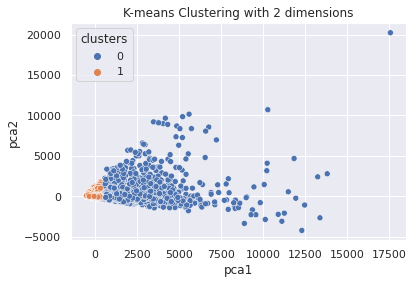

In [ ]:
from sklearn.decomposition import PCA

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(encoded_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=encoded_data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
encoded_data[encoded_data['clusters'] == 1]

,loan_amount_000s,applicant_income_000s,agency_abbr_CFPB,agency_abbr_FDIC,agency_abbr_FRS,agency_abbr_HUD,agency_abbr_NCUA,agency_abbr_OCC,loan_type_name_Conventional,property_type_name_One-to-four family dwelling (other than manufactured housing),...,FIP_06099,FIP_06101,FIP_06103,FIP_06105,FIP_06107,FIP_06109,FIP_06111,FIP_06113,FIP_06115,clusters
0,238.0,90.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,123.0,100.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,372.0,84.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,636.0,189.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,324.0,82.0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235037,300.0,124.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
235038,400.0,130.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
235039,716.0,139.0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
235040,200.0,48.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
encoded_data

,loan_amount_000s,applicant_income_000s,agency_abbr_CFPB,agency_abbr_FDIC,agency_abbr_FRS,agency_abbr_HUD,agency_abbr_NCUA,agency_abbr_OCC,loan_type_name_Conventional,property_type_name_One-to-four family dwelling (other than manufactured housing),...,FIP_06099,FIP_06101,FIP_06103,FIP_06105,FIP_06107,FIP_06109,FIP_06111,FIP_06113,FIP_06115,clusters
0,238.0,90.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,123.0,100.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,372.0,84.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,636.0,189.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,324.0,82.0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235037,300.0,124.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
235038,400.0,130.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
235039,716.0,139.0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
235040,200.0,48.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
encoded_data_labels

0         1
1         1
2         1
3         1
4         1
         ..
235037    0
235038    0
235039    1
235040    1
235041    0
Name: approved, Length: 235042, dtype: int64

In [ ]:
error_percentage = 0

for i in range(len(encoded_data['clusters'])):
  if encoded_data['clusters'][i] != encoded_data_labels[i]:
    error_percentage += 1

error_percentage/len(encoded_data['clusters'])

0.1789254686396474

In [ ]:
wrong_values = encoded_data[encoded_data['clusters'] != encoded_data_labels].reset_index(drop=True)

wrong_values

,loan_amount_000s,applicant_income_000s,agency_abbr_CFPB,agency_abbr_FDIC,agency_abbr_FRS,agency_abbr_HUD,agency_abbr_NCUA,agency_abbr_OCC,loan_type_name_Conventional,property_type_name_One-to-four family dwelling (other than manufactured housing),...,FIP_06099,FIP_06101,FIP_06103,FIP_06105,FIP_06107,FIP_06109,FIP_06111,FIP_06113,FIP_06115,clusters
0,270.0,65.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,256.0,134.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,182.0,78.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,424.0,228.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,321.0,173.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42050,769.0,320.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
42051,79.0,174.0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
42052,300.0,124.0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
42053,400.0,130.0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


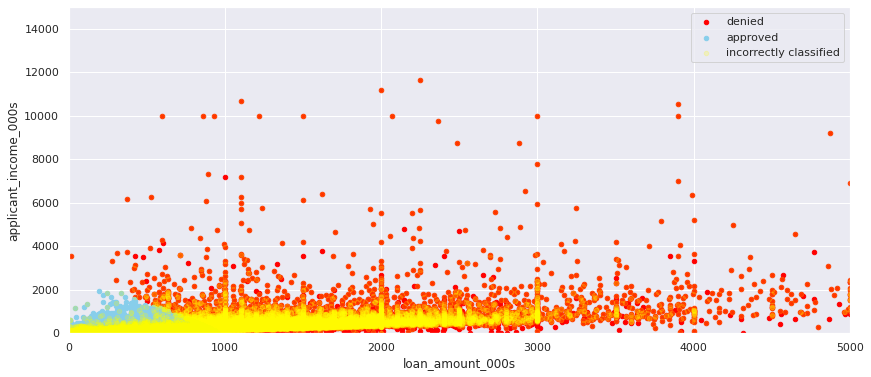

In [ ]:
ax1 = encoded_data[encoded_data['clusters'] == 0].plot(kind='scatter', x='loan_amount_000s', y='applicant_income_000s', color='red', figsize=(14,6), label='denied')   
ax2 = encoded_data[encoded_data['clusters'] == 1].plot(kind='scatter', x='loan_amount_000s', y='applicant_income_000s', color='skyblue', ax=ax1, label='approved')  
plt.xlim([0, 5000])  
plt.ylim([0,15000])
ax3 = encoded_data[encoded_data['clusters'] != encoded_data_labels].plot(kind='scatter', x='loan_amount_000s', y='applicant_income_000s', color='yellow', ax=ax1, alpha=0.2, label='incorrectly classified')


(0.0, 15000.0)

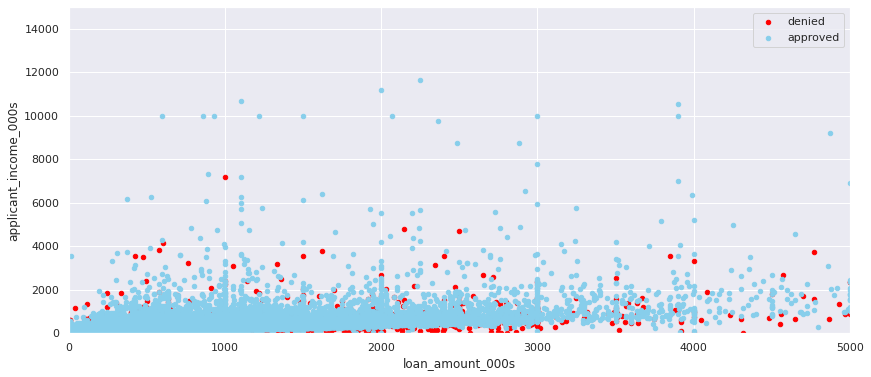

In [ ]:
ax1 = encoded_data[encoded_data['approved'] == 0].plot(kind='scatter', x='loan_amount_000s', y='applicant_income_000s', color='red', figsize=(14,6), label='denied')   
ax2 = encoded_data[encoded_data['approved'] == 1].plot(kind='scatter', x='loan_amount_000s', y='applicant_income_000s', color='skyblue', ax=ax1, label='approved')  
plt.xlim([0, 5000])  
plt.ylim([0,15000])

In [ ]:
label_encoded_data_labels = label_encoded_data['approved']
label_encoded_data = label_encoded_data.drop(columns=['approved'])

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
label_encoded_data['clusters'] = km.fit_predict(label_encoded_data)

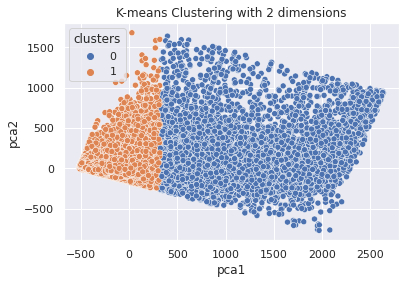

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(label_encoded_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=label_encoded_data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
error_percentage = 0

for i in range(len(label_encoded_data['clusters'])):
  if label_encoded_data['clusters'][i] != label_encoded_data_labels[i]:
    error_percentage += 1

error_percentage/len(label_encoded_data['clusters'])

0.19529275618825573